In [54]:
import numpy as np
import pandas as pd
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Loading Dataset

In [4]:
train=pd.read_csv("/content/Training.csv")
test=pd.read_csv("/content/Testing.csv")

# EDA

In [5]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [7]:
nRow,nCol=train.shape
print(f' There are {nRow} rows and {nCol} columns. Prognosis is the label variable.')

 There are 4920 rows and 134 columns. Prognosis is the label variable.


In [8]:
train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [9]:
print(f'There are 41 diseases in the dataset and each containing 120 rows')

There are 41 diseases in the dataset and each containing 120 rows


# Data Preprocessing

In [10]:
train=train.drop(["Unnamed: 133"],axis=1)

In [11]:
train.prognosis.value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [12]:
train.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [13]:
test.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

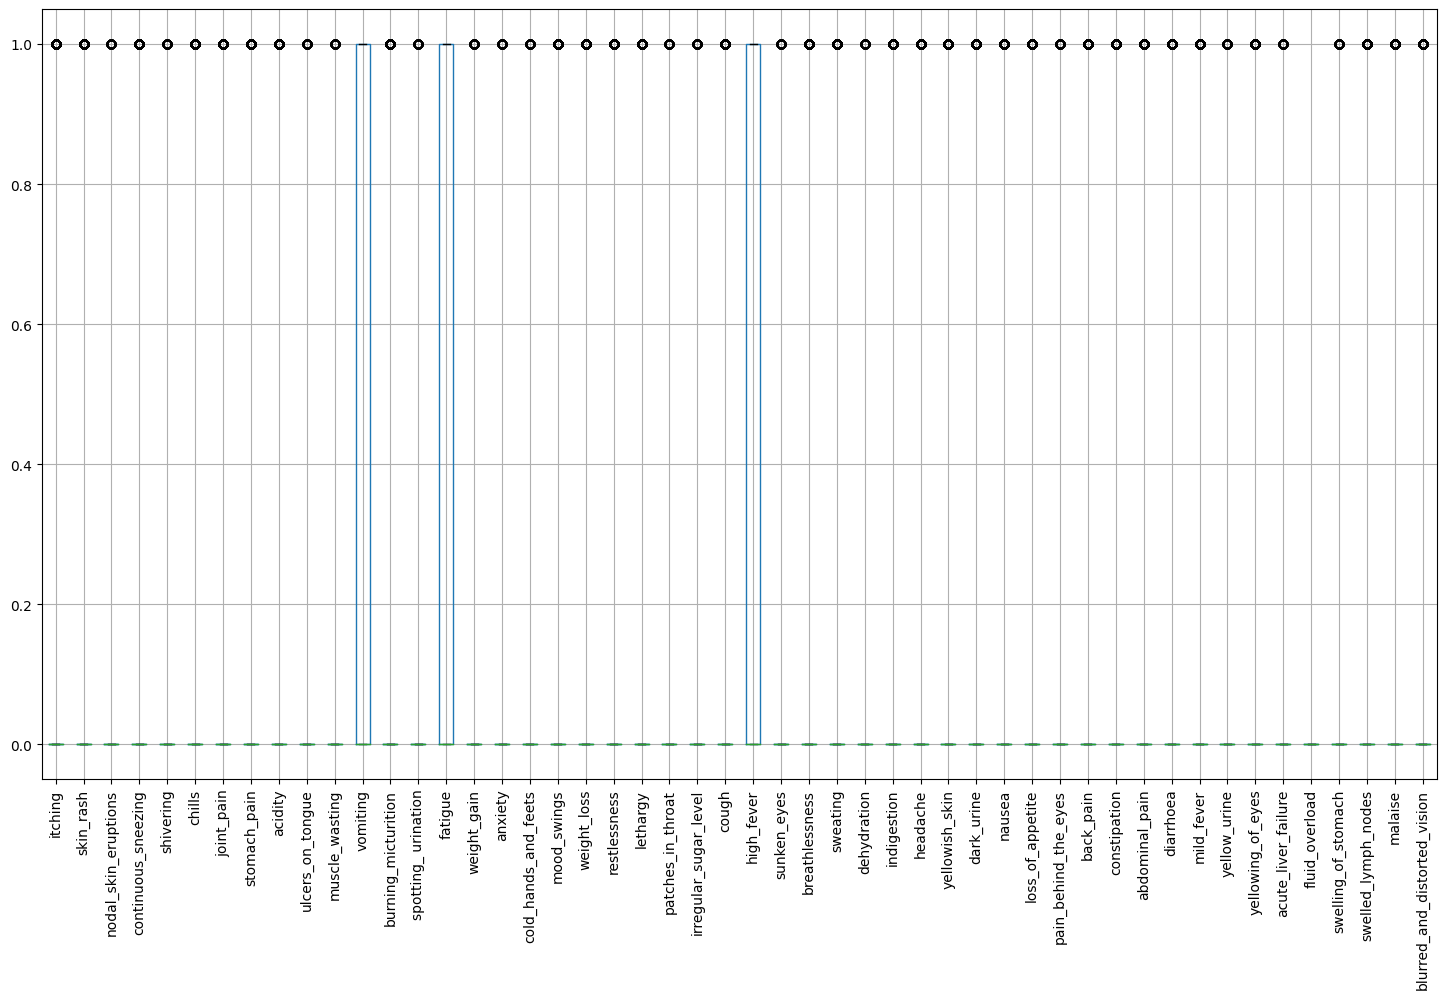

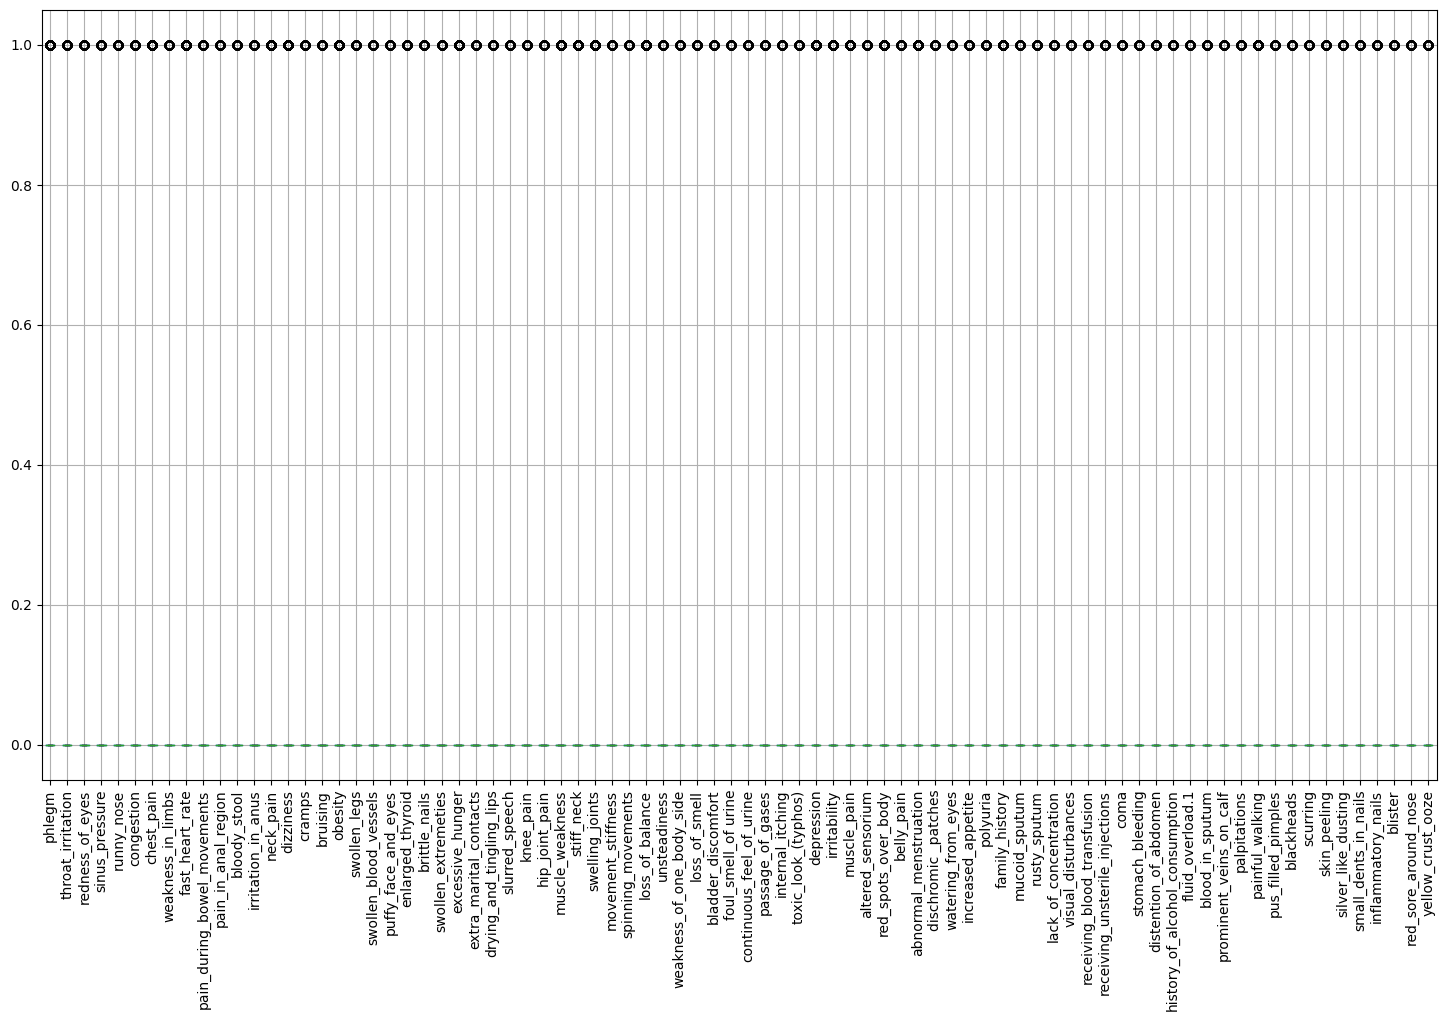

 No outliers


In [14]:
temp_df=train.iloc[:,:-1]
plt.subplots(figsize=(18,10))
temp_df.iloc[:,:50].boxplot()
plt.xticks(rotation=90)
plt.show()

plt.subplots(figsize=(18,10))
temp_df.iloc[:,50:].boxplot()
plt.xticks(rotation=90)
plt.show()

print(f' No outliers')

In [18]:
label = train[["prognosis"]]
X = train.drop(["prognosis"],axis=1)
Y = test.drop(["prognosis"],axis=1)

In [19]:
label.head()

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


In [20]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Y.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,label,test_size=0.2,random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Logistic Regression

In [66]:
lr=LogisticRegression()
model_lr = lr.fit(xtrain,ytrain)
pred_lr_train = model_lr.predict(xtrain)
pred_lr_test = model_lr.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,pred_lr_train))
print("testing accuracy is:",accuracy_score(ytest,pred_lr_test))

training accuracy is: 1.0
testing accuracy is: 1.0


In [67]:
with open('model_LR.pkl','wb') as f:
    pickle.dump(model_lr,f)

In [68]:
test.join(pd.DataFrame(model_lr.predict(Y),columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


Text(0.5, 445.55555555555554, 'Predicted label')

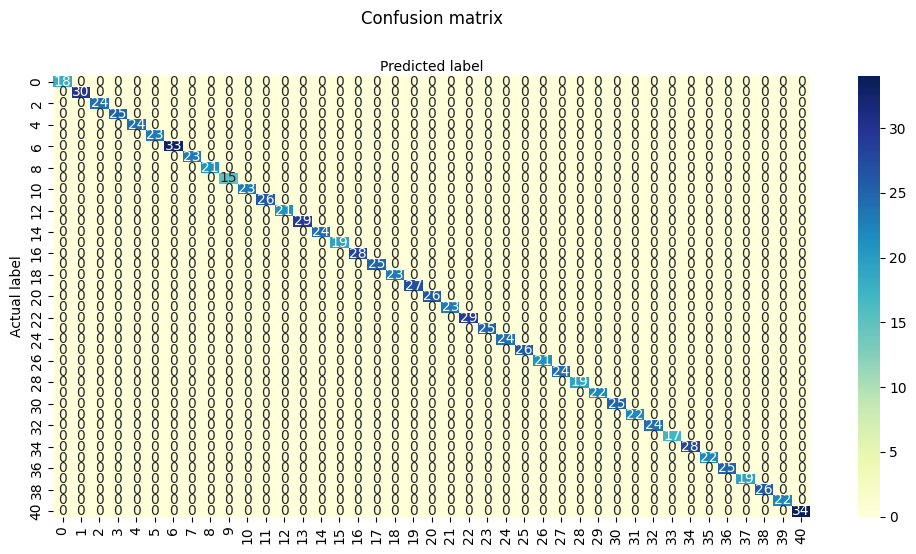

In [69]:
cm=confusion_matrix(ytest, pred_lr_test)
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
n=41
print("Actual Prognosis: "+ test.iloc[n]["prognosis"])
print("Predicted Prognosis: "+ model_lr.predict(np.array(Y.iloc[n]).reshape(1, -1))[0])

Actual Prognosis: Fungal infection
Predicted Prognosis: Fungal infection


# Random Forest Classifier

In [51]:
rf= RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18)
model_rf = rf.fit(xtrain,ytrain)
pred_rf_train = model_rf.predict(xtrain)
pred_rf_test = model_rf.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,pred_rf_train))
print("testing accuracy is:",accuracy_score(ytest,pred_rf_test))

training accuracy is: 1.0
testing accuracy is: 1.0


In [46]:
with open('model_RF.pkl','wb') as f:
    pickle.dump(model_rf,f)

PREDICTIONS

In [47]:
test.join(pd.DataFrame(model_rf.predict(Y),columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


Text(0.5, 445.55555555555554, 'Predicted label')

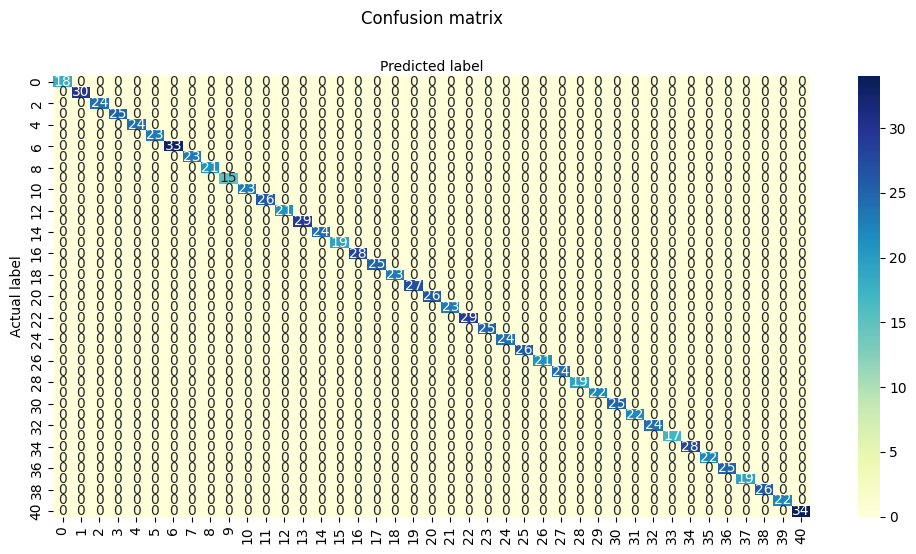

In [59]:
cm=confusion_matrix(ytest, pred_rf_test)
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
n=41
print("Actual Prognosis: "+ test.iloc[n]["prognosis"])
print("Predicted Prognosis: "+ model_rf.predict(np.array(Y.iloc[n]).reshape(1, -1))[0])

Actual Prognosis: Fungal infection
Predicted Prognosis: Chicken pox


# Support Vector Machine

In [36]:
svm_model = SVC(C= .1, kernel='linear', gamma= 1)
model_SVM=svm_model.fit(xtrain, ytrain)

pred_svm_train = svm_model.predict(xtrain)
pred_svm_test = svm_model.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,pred_svm_train))
print("testing accuracy is:",accuracy_score(ytest,pred_svm_test))

training accuracy is: 1.0
testing accuracy is: 1.0


In [37]:
with open('model_SVM.pkl','wb') as f:
    pickle.dump(model_SVM,f)

In [38]:
test.join(pd.DataFrame(model_SVM.predict(Y),columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


Text(0.5, 445.55555555555554, 'Predicted label')

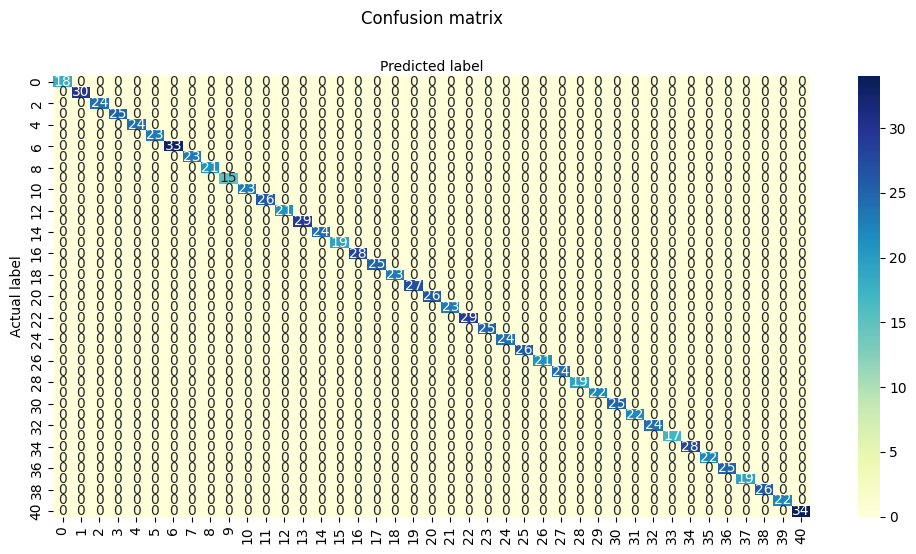

In [60]:
cm=confusion_matrix(ytest, pred_svm_test)
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
n=41
print("Actual Prognosis: "+ test.iloc[n]["prognosis"])
print("Predicted Prognosis: "+ model_SVM.predict(np.array(Y.iloc[n]).reshape(1, -1))[0])

Actual Prognosis: Fungal infection
Predicted Prognosis: Fungal infection
